<center><h1> Machine Learning in Python <h1>
    <img src="https://bdaaosu.org/static/img/Logo.png" width="40%"> </center>

This notebook was prepared and created by [Leo Glowacki](http://www.leoglowacki.com). Any questions can be sent through (preferably) the BDAA slack or through the <a href="http://www.leoglowacki.com/contact">contact form on my website</a>.

----

<h3> Importing Packages </h3>  

First things first- importing packages. We'll be using:

[Pandas](http://pandas.pydata.org/) - library for data manipulation and analysis

[Scikit-Learn](https://scikit-learn.org/stable/) - super popular package for ML in python (we'll see why!)

You will likely need to add python-graphviz to your Anaconda environment. Most common data science packages come included with Anaconda, however, python-graphviz not included. We'll do this together. ([Instructions if you need them later](https://www.tutorialspoint.com/add-packages-to-anaconda-environment-in-python)) 

If you are having any issues intalling or updating packages in your Anaconda environment, this is a reported issue. Luckily, there is a [fix (scroll to bottom)](https://github.com/ContinuumIO/anaconda-issues/issues/9087). Ask a TA if you need help! It can be a little confusing if you haven't worked with Anaconda before. 

(Alternatively install with: 
> conda install python-graphviz

But if shell comands are intimitdating to you, no worries, just follow along and ask a TA if you need help)

In [2]:
# importing pandas
import pandas as pd

# packages used for graphing decision trees
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

# Scikit-Learn 
# This package is huge, so we only want to import what we're going to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

We will use this function later to graph our decision tress. Feel free to use this code in your own projects.

In [3]:
def graph_decision_tree(dt):
    # Create DOT data
    dot_data = export_graphviz(dt, out_file=None,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_names, class_names= class_names)

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)  

    # Show graph
    return Image(graph.create_png())

## Step 1: Get Data

For this first part, we're going to be using a somewhat 'famous' mushrooms dataset

[Dataset Info](https://www.kaggle.com/uciml/mushroom-classification)

[Download Link](https://www.kaggle.com/uciml/mushroom-classification/download/FMiTAKyaW7e7uQijwjGk%2Fversions%2FegC1k5tVZm5ghrgU3maT%2Ffiles%2Fmushrooms.csv)

[Documentation: pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [4]:
# import our CSV file as a pandas dataframe called 'df'
# you will often see pandas dataframes called 'df'
df = pd.read_csv("mushrooms.csv")

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Step 2: Data Cleaning & Feature Engineering

In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Everything is being considered an 'object', but really, it's a categorical variable. Let's fix that.

In [7]:
df = pd.read_csv("mushrooms.csv", dtype='category')

To make our features, we want to use everything, *except* our class variable (what we're trying to predict).

[Documentation: pandas.Dataframe.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [8]:
feature_vec = df.drop(['class'], axis=1)

In [9]:
feature_vec

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


Now that we have selected our feature vector, we need to change it to a form that Decision Trees can use. Since DTs use numbers and not letters, we need to transform our data into 0s and 1s it can interpret.

[Documentation: pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [10]:
feature_vec = pd.get_dummies(feature_vec)
feature_vec

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [11]:
# X is our features, or our 'feature vector'
X = feature_vec
# Y is our labels
Y = df['class']

feature_names = list(X.columns)
class_names = df['class'].unique()

In [12]:
print(feature_names)
print(class_names)

['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f', 'stalk-surf

#### Train - Test Split

In [13]:
# Splitting the data into our training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## Step 3: Model Building

## Decision Trees
### Decision Tree: Take One

To grow a Decision Tree, we initialize the Decision Tree, then 'fit' it to our training data.  

[Documentation: DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [14]:
# initalize Decision Tree
dt = DecisionTreeClassifier(max_depth=2)
# train it oun our training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now that we've built our decision tree, let's see what it looks like:

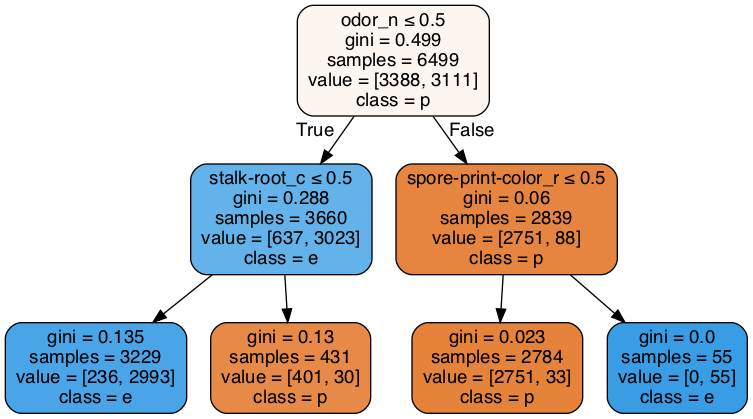

In [15]:
graph_decision_tree(dt)

GINI is a measure of impurity. A node is "pure" if gini=0. The higher the GINI score, the more "disorganized" the classes in the node are. 

Food for thought: What does odor being at the top of the tree indicate about it's ability to predict whether a mushroom is poisonous or edible?

How well does the Decision Tree predict observations it was trained on?


[Documentation: Scikit-learn Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [16]:
y_pred = dt.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Trainnig Accuracy:", accuracy)

Trainnig Accuracy: 0.9539929219879981


Ok that's great, we probably won't accidentally poison ourselves if we come across a mushroom we have in our training set, but what about new mushrooms?  To get an estimate of how well our model will perform, we can the testing data.

In [17]:
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.955076923076923


This is about the same as the training accuracy. This is good. It means our model has probably not overfit the training data. 

Can we do any better though? Let's see what happens if we increase the depth of our tree.

### Decision Tree: Take Two (Deeper Tree)

In [18]:
# initalize Decision Tree
dt = DecisionTreeClassifier(max_depth=4)
# train it oun our training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

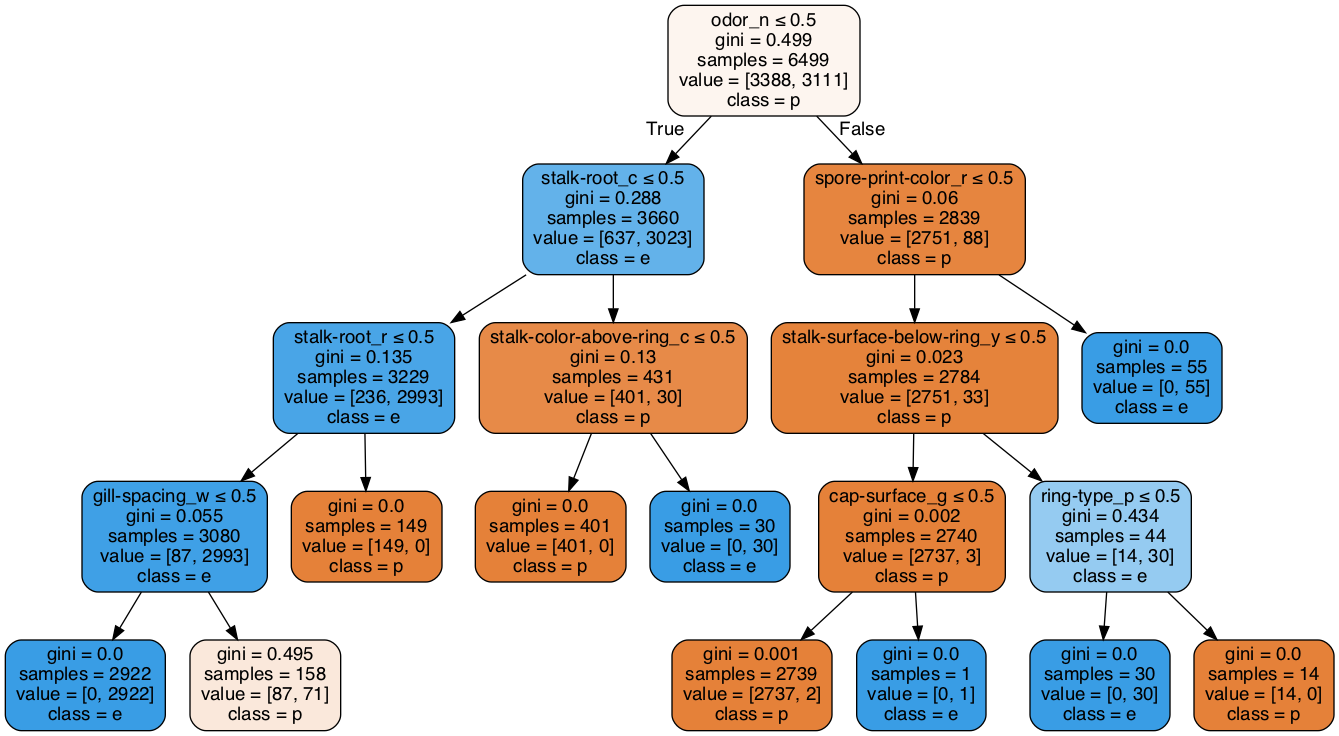

In [19]:
graph_decision_tree(dt)

In [20]:
y_pred = dt.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Trainnig Accuracy:", accuracy)

Trainnig Accuracy: 0.988767502692722


In [21]:
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9833846153846154


Even better! 

But how do we know what the best value for our hyperparameter `max_depth`? Can we automate this process?

### Decision Tree: Take 3 (Automated Hyperparameter Selection)
[Documentation: sklearn.model_selection.GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [22]:
# Dictionary of hyper-parameters you want to test
params = {'max_depth': list(range(1, 25))}
# initiate Grid Search Crossfold Validator for a Decision Tree
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [23]:
grid_search_cv.best_params_

{'max_depth': 8}

In [24]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
dt = grid_search_cv.best_estimator_

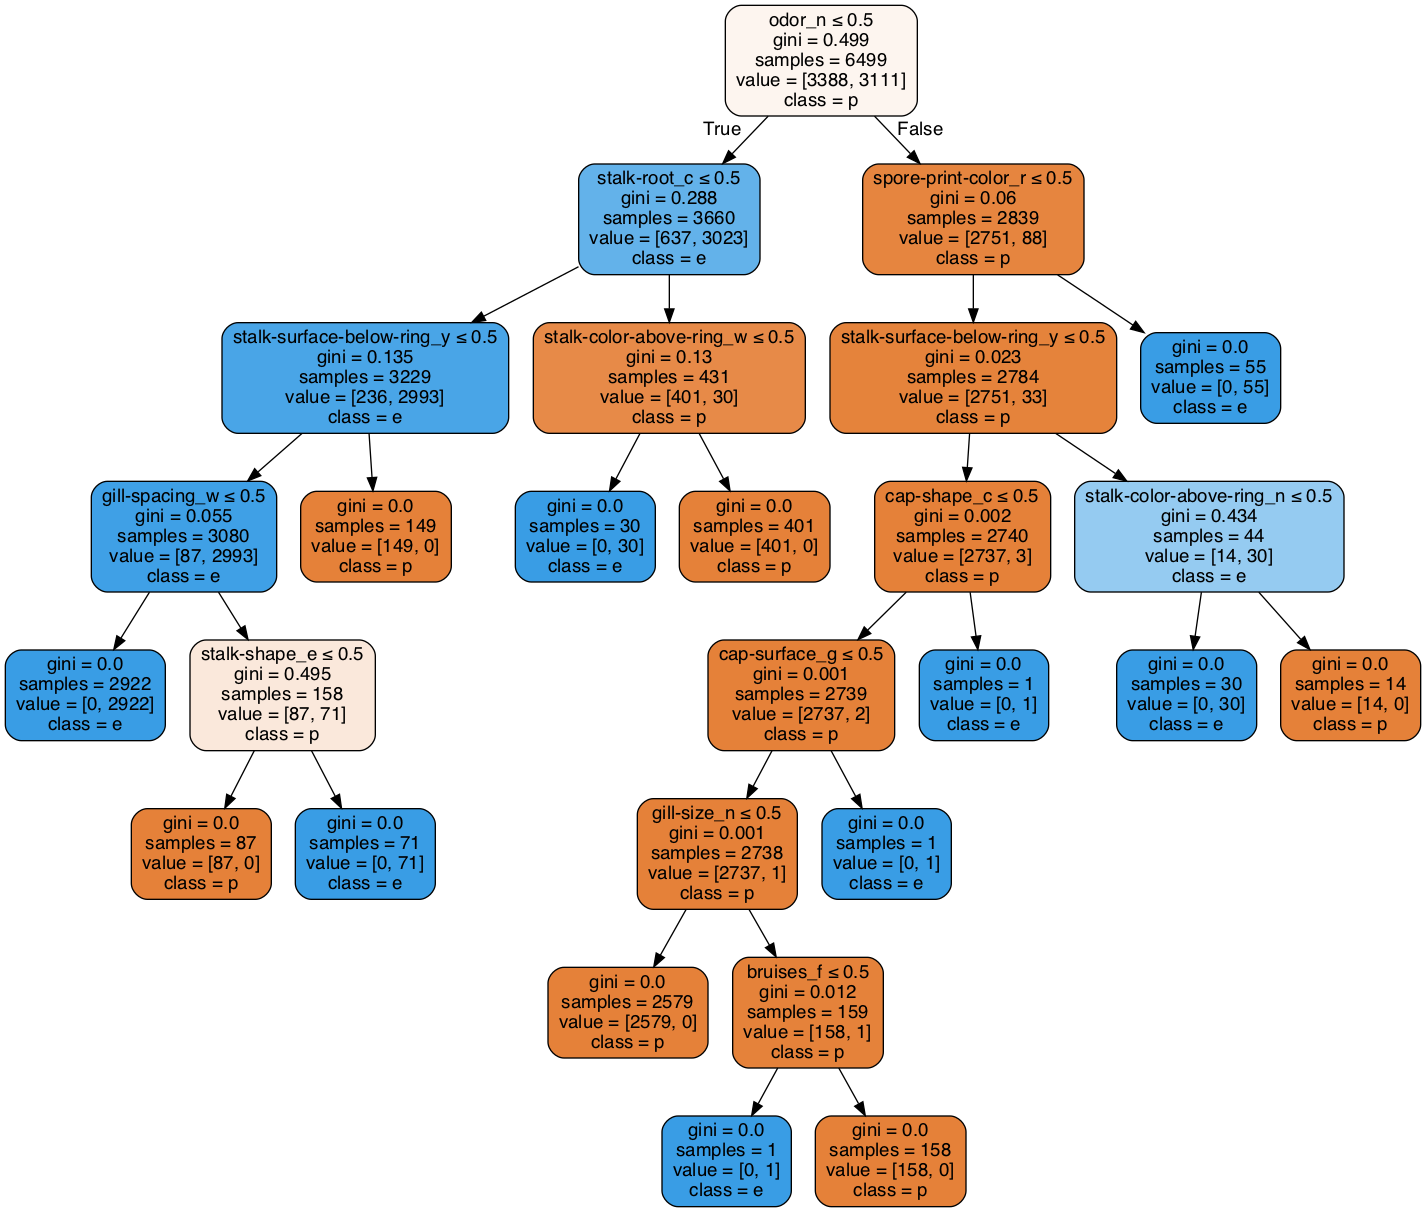

In [26]:
graph_decision_tree(dt)

## Step 4: "Final" Model Evaluation

Now let's see how accurate it is on observations it has never 'seen' or had it's hyperparameters tuned with:

In [27]:
# Reporting Testing Accuracy
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


Nice! We would likely fair very well if we used this is the wild (assuming our data is representative of mushrooms we might find in the wild). 

**DISCLAIMER: Don't try this at home kids.**

------

# Your Turn! 

Remember the "USVideos.csv" dataset from the EDA workshop last week? Let's see if we can predict the category of the video based on its features (likes, dislikes, views, etc.). 

## Step 1: Get the data

[Dataset Info](https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv)

[Download the Dataset Here](https://www.kaggle.com/datasnaek/youtube-new/download/ZGIimwlwh1EQ13BoyAyJ%2Fversions%2FHaqpEW6xcYnw6T0JDLWk%2Ffiles%2FUSvideos.csv?datasetVersionNumber=115)

In [28]:
# import the CSV file
df = pd.read_csv("USvideos.csv")

In [28]:
# view your dataframe to make sure everything imported as intended
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


## Step 2: Data Cleaning & Feature Engineering

In [29]:
# check the column data types in the dataframe
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [30]:
# Fix a few columns to be the proper data types

# fixing 'trending_date' and 'publish_time' to be dates
df['trending_date'] = pd.to_datetime(df['trending_date'],format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'])
# making 'category_id' a categorical (factor) variable
df['category_id'] = df['category_id'].astype('category')

In [31]:
# double check to see if the typecasting worked
df.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                          category
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
dtype: object

Last time in our EDA, we created a couple variables. Let's recreate them here:

In [32]:
# create variable title length
df['title_length'] = df['title'].str.len()
# create variable percent likes
df['percent_likes'] = df['likes'] / df['views']

In [33]:
# check to see our new variables
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,percent_likes
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,0.076869
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,0.040179
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,0.045758
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32,0.029641
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,0.063097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,28,0.022639
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,26,0.056356
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,84,0.045073
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,35,0.034086


Now we're ready to create our input feature vector and label vector.

In [34]:
# X is our features, or our 'feature vector'
# we need to limit X to numerical and boolean columns
feature_names = ['views', 'likes', 'dislikes', 'comments_disabled', 'comment_count', 'ratings_disabled', 'video_error_or_removed', 'title_length', 'percent_likes']
class_names = [str(i) for i in df['category_id'].unique()]
X = df[feature_names]
# Y is our labels
Y = df['category_id']

#### Train - Test Split

In [35]:
# Splitting the data into our training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## Step 3: Model Building

In [36]:
# Dictionary of hyper-parameters you want to test
params = {'max_depth': list(range(2, 50)), 'min_samples_split': [2, 3, 4]}
# initiate Grid Search Crossfold Validator for a Decision Tree
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,

In [37]:
grid_search_cv

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,

In [39]:
grid_search_cv.best_params_

{'max_depth': 42, 'min_samples_split': 2}

In [40]:
dt = grid_search_cv.best_estimator_

## Step 4: "Final" Model Evaluation

In [41]:
# Reporting Training Accuracy
y_pred = dt.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


In [42]:
# Reporting Test Accuracy
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7387057387057387


## Random Forest

### Random Forest: Take One - Simple RF

In [43]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
# Reporting Training Accuracy
y_pred = rf.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


In [45]:
# Reporting Test Accuracy
y_pred = rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8378510378510379


Wow! This is already a huge performance boost!

### Random Forest: Choosing the 'Best' Random Forest

In [46]:
# Dictionary of hyper-parameters you want to test
params = {'n_estimators': [100, 125, 150], 
          'max_depth': [40, 45, 50], 
          'min_samples_split': [2]}
# initiate Grid Search Crossfold Validator for a Decision Tree
grid_search_cv = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [47]:
grid_search_cv

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
grid_search_cv.best_params_

{'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 150}

In [49]:
rf = grid_search_cv.best_estimator_

In [49]:
# Reporting Training Accuracy
y_pred = rf.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


In [50]:
# Reporting Test Accuracy
y_pred = rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.842979242979243


There are many other parameter combinations we could test to try and improve the accuracy (as well as other metrics besides accuracy we could use to determine the best model), but this is a good start. Go forth and learn! 